In [32]:
import matplotlib
matplotlib.use('agg')
import pyart
from matplotlib import pyplot as plt
import os
from netCDF4 import num2date, date2num
import numpy as np
from time import time, strftime, strptime
from datetime import datetime
import os
%matplotlib inline

In [4]:
radar1_fname = '/Users/scollis/Downloads/KMAF20150525_140242_V06.gz'
radar2_fname = '/Users/scollis/Downloads/KSJT20150525_140347_V06.gz'

In [35]:

radar1 = pyart.io.read(radar1_fname)
radar2 = pyart.io.read(radar2_fname)
     
rain_z = radar1.fields['reflectivity']['data'].copy()
z_lin = 10.0**(radar1.fields['reflectivity']['data']/10.)
rain_z = (z_lin/300.0)**(1./1.4)  #Z=300 R1.4
radar1.add_field_like('reflectivity', 'rain_z',  rain_z, replace_existing = True)
radar1.fields['rain_z']['units'] = 'mm/h'
radar1.fields['rain_z']['standard_name'] = 'rainfall_rate'
radar1.fields['rain_z']['long_name'] = 'rainfall_rate_from_z'
radar1.fields['rain_z']['valid_min'] = 0
radar1.fields['rain_z']['valid_max'] = 500
rain_z = radar2.fields['reflectivity']['data'].copy()
z_lin = 10.0**(radar2.fields['reflectivity']['data']/10.)
rain_z = (z_lin/300.0)**(1./1.4)  #Z=300 R1.4
radar2.add_field_like('reflectivity', 'rain_z',  rain_z, replace_existing = True)
radar2.fields['rain_z']['units'] = 'mm/h'
radar2.fields['rain_z']['standard_name'] = 'rainfall_rate'
radar2.fields['rain_z']['long_name'] = 'rainfall_rate_from_z'
radar2.fields['rain_z']['valid_min'] = 0
radar2.fields['rain_z']['valid_max'] = 500



grid = pyart.map.grid_from_radars(
     (radar1,radar2), grid_shape=(1, 1401, 1951),
    grid_limits=((0, 17000),(-70000, 70000), (-10000, 180000)),
    fields=radar1.fields.keys(), gridding_algo="map_gates_to_grid",
    weighting_function='BARNES')#, grid_origin = (29.0958759,-103.7425205))

In [7]:
#29.0958759,-103.7425205
min_lat = 31.5
min_lon = -102.5
max_lon = -100.5
max_lat = 32.5

/Users/scollis/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/scollis/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


/Users/scollis/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


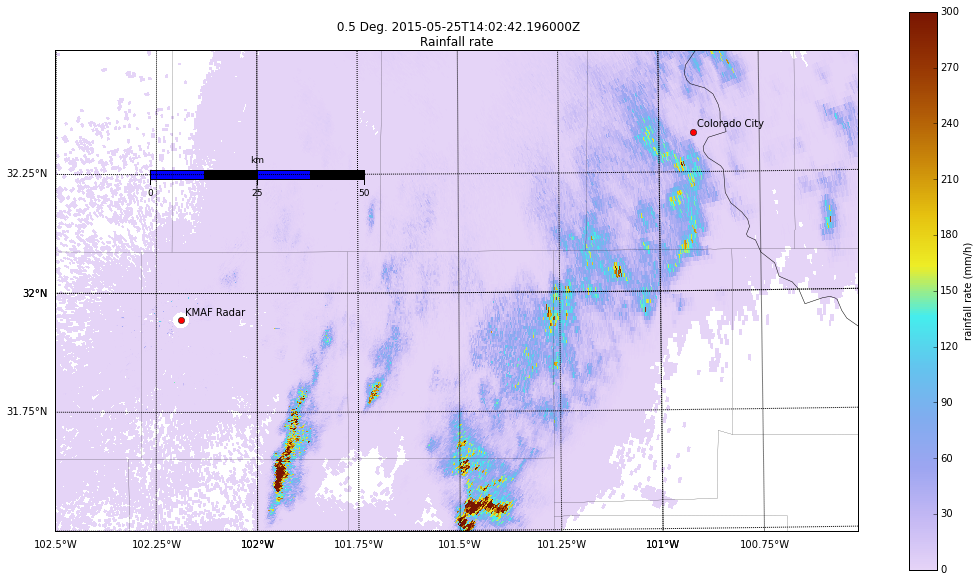

In [8]:
myd = pyart.graph.RadarMapDisplay(radar1)
fig = plt.figure(figsize = [18,10])
myd.plot_ppi_map( 'rain_z', vmin = 0, vmax = 300, 
                 resolution = 'h', max_lat = max_lat, 
                 min_lat = min_lat, min_lon = min_lon, max_lon = max_lon,
                cmap = pyart.graph.cm.LangRainbow12)
m = myd.basemap
m.drawparallels(np.arange(min_lat,max_lat, 0.25),labels=[1,0,0,0])
m.drawmeridians(np.arange(min_lon,max_lon, 0.25),labels=[0,0,0,1])
m.drawrivers()
m.drawcounties()
m.drawstates()
myd.plot_point( -100.915011,32.334008, label_text = 'Colorado City', 
               label_offset = (0.01,0.01) )
myd.plot_point( radar1.longitude['data'][0] ,radar1.latitude['data'][0], 
               label_text = 'KMAF Radar', label_offset = (0.01,0.01) )
m.drawmapscale(-102., 32.25, -102., 32.25, 50, barstyle='fancy', fontcolor='k', fillcolor1='b', fillcolor2='k')


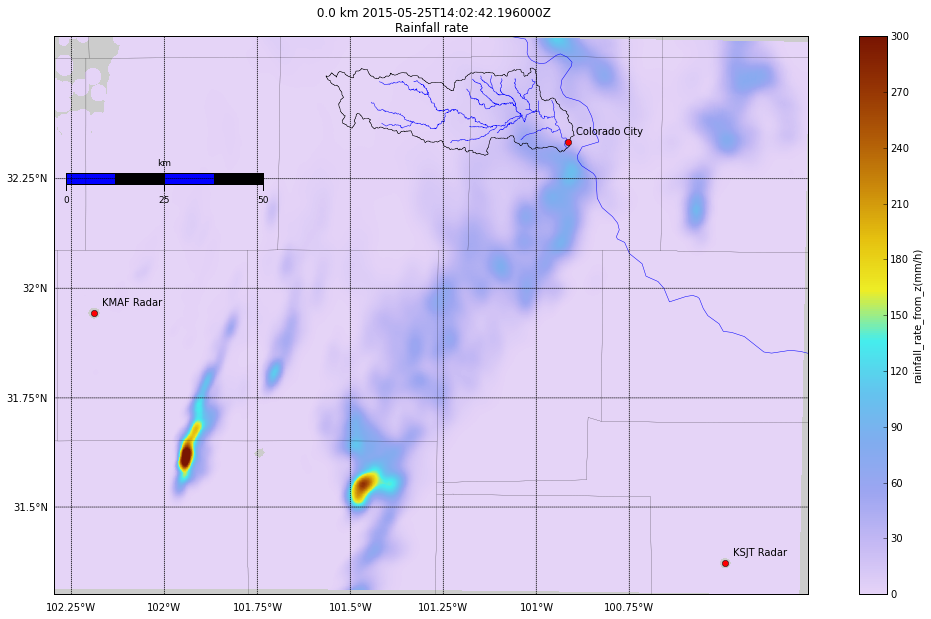

In [39]:
display = pyart.graph.GridMapDisplay(grid)
fig = plt.figure(figsize = [18,10])
display.plot_basemap(lat_lines=np.arange(min_lat,max_lat,.25),
                     lon_lines=np.arange(min_lon, max_lon, .25),
                     resolution='h')
display.plot_grid('rain_z', vmin=0, vmax=300, cmap = pyart.graph.cm.LangRainbow12)
display.basemap.drawcounties()
display.basemap.drawrivers(color = 'b')
display.basemap.drawlsmask()
display.basemap.readshapefile('../shapes/boundary', 'boundary')
display.basemap.readshapefile('../shapes/flowlines', 'flowlines', color = 'b')

xcf,ycf = display.basemap( -100.915011,32.334008)
display.basemap.plot(xcf,ycf,'ro')
plt.text(xcf+2000.,ycf+2000., 'Colorado City')

xcf,ycf = display.basemap( radar1.longitude['data'][0] ,radar1.latitude['data'][0])
display.basemap.plot(xcf,ycf,'ro')
plt.text(xcf+2000.,ycf+2000., 'KMAF Radar')
xcf,ycf = display.basemap( radar2.longitude['data'][0] ,radar2.latitude['data'][0])
display.basemap.plot(xcf,ycf,'ro')
plt.text(xcf+2000.,ycf+2000., 'KSJT Radar')

display.basemap.drawmapscale(-102., 32.25, -102., 32.25, 50, barstyle='fancy', fontcolor='k', fillcolor1='b', fillcolor2='k')



In [31]:
lat = 32.334008
lon = -100.915011
dist = np.sqrt((grid.point_latitude['data'] - lat)**2 + \
               (grid.point_longitude['data']- lon)**2)
print grid.fields['rain_z']['data'][np.where(dist == dist.min())]

[27.648780822753906]


In [48]:
grid2 = pyart.map.grid_from_radars(
     (radar1,radar2), grid_shape=(1, 301, 701),
    grid_limits=((0, 17000),(40000, 70000), (60000, 120000)),
    fields=radar1.fields.keys(), gridding_algo="map_gates_to_grid",
    weighting_function='BARNES')#, grid_origin = (29.0958759,-103.7425205))

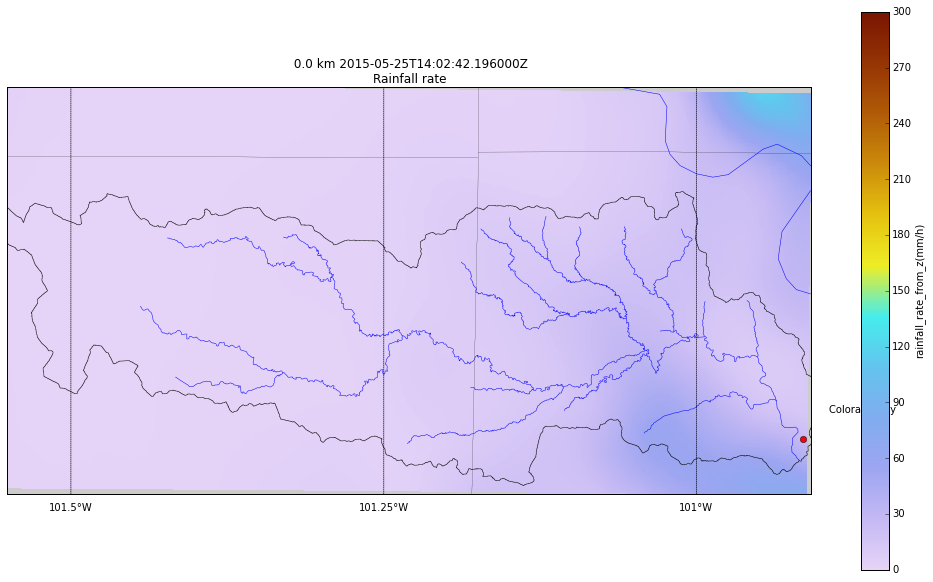

In [49]:
display = pyart.graph.GridMapDisplay(grid2)
fig = plt.figure(figsize = [18,10])
display.plot_basemap(lat_lines=np.arange(min_lat,max_lat,.25),
                     lon_lines=np.arange(min_lon, max_lon, .25),
                     resolution='h')
display.plot_grid('rain_z', vmin=0, vmax=300, cmap = pyart.graph.cm.LangRainbow12)
display.basemap.drawcounties()
display.basemap.drawrivers(color = 'b')
display.basemap.drawlsmask()
display.basemap.readshapefile('../shapes/boundary', 'boundary')
display.basemap.readshapefile('../shapes/flowlines', 'flowlines', color = 'b')

xcf,ycf = display.basemap( -100.915011,32.334008)
display.basemap.plot(xcf,ycf,'ro')
plt.text(xcf+2000.,ycf+2000., 'Colorado City')




In [ ]:
print pyart.core.geographic_to_cartesian

In [ ]:
print pyart.core.cartesian_to_geographic

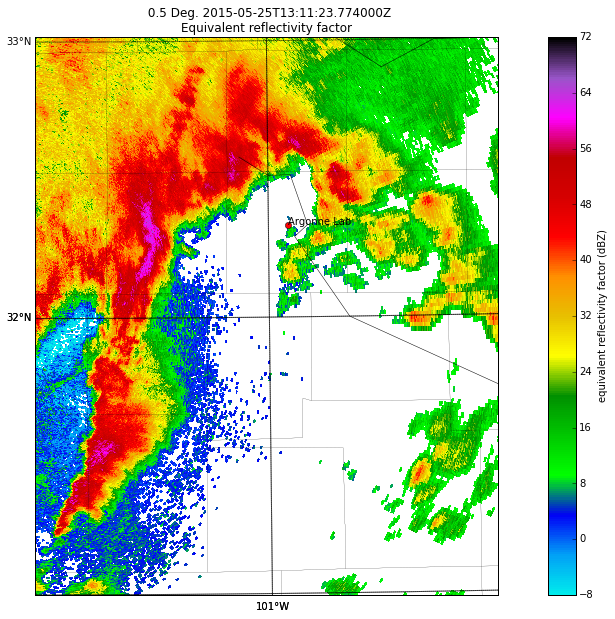

In [40]:
#myd = pyart.graph.RadarMapDisplay(radar)
fig = plt.figure(figsize = [18,10])
myd.plot_ppi_map( 'reflectivity', vmin = -8, vmax = 72, 
                 resolution = 'l', max_lat = max_lat, 
                 min_lat = min_lat, min_lon = min_lon, max_lon = max_lon,
                cmap = pyart.graph.cm.NWSRef)
m = myd.basemap
m.drawparallels(np.arange(min_lat,max_lat, 1),labels=[1,0,0,0])
m.drawmeridians(np.arange(min_lon,max_lon, 1),labels=[0,0,0,1])
m.drawrivers()
m.drawcounties()
m.drawstates()
myd.plot_point( -100.915011,32.334008, label_text = 'Argonne Lab', label_offset = (0.0,0.0) )



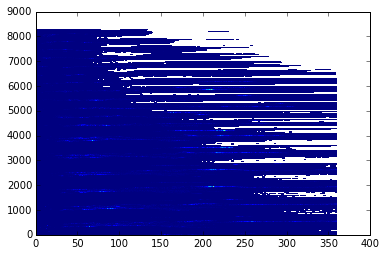

In [9]:
plt.pcolormesh(radar.fields['rain_z']['data'][:,0:360])

In [13]:
display.basemap.drawrivers?

In [12]:
print radar.latitude
print radar.longitude

{'units': 'degrees_north', 'long_name': 'Latitude', 'standard_name': 'Latitude', 'data': array([ 31.94346046])}
{'units': 'degrees_east', 'long_name': 'Longitude', 'standard_name': 'Longitude', 'data': array([-102.18924713])}


In [1]:
def gridit(radar1_fname, radar2_fname):
    radar1 = pyart.io.read(radar1_fname)
    radar2 = pyart.io.read(radar2_fname)

    rain_z = radar1.fields['reflectivity']['data'].copy()
    z_lin = 10.0**(radar1.fields['reflectivity']['data']/10.)
    rain_z = (z_lin/300.0)**(1./1.4)  #Z=300 R1.4
    radar1.add_field_like('reflectivity', 'rain_z',  rain_z, replace_existing = True)
    radar1.fields['rain_z']['units'] = 'mm/h'
    radar1.fields['rain_z']['standard_name'] = 'rainfall_rate'
    radar1.fields['rain_z']['long_name'] = 'rainfall_rate_from_z'
    radar1.fields['rain_z']['valid_min'] = 0
    radar1.fields['rain_z']['valid_max'] = 500
    rain_z = radar2.fields['reflectivity']['data'].copy()
    z_lin = 10.0**(radar2.fields['reflectivity']['data']/10.)
    rain_z = (z_lin/300.0)**(1./1.4)  #Z=300 R1.4
    radar2.add_field_like('reflectivity', 'rain_z',  rain_z, replace_existing = True)
    radar2.fields['rain_z']['units'] = 'mm/h'
    radar2.fields['rain_z']['standard_name'] = 'rainfall_rate'
    radar2.fields['rain_z']['long_name'] = 'rainfall_rate_from_z'
    radar2.fields['rain_z']['valid_min'] = 0
    radar2.fields['rain_z']['valid_max'] = 500

    grid2 = pyart.map.grid_from_radars(
         (radar1,radar2), grid_shape=(1, 301, 701),
        grid_limits=((0, 17000),(40000, 70000), (60000, 120000)),
        fields=radar1.fields.keys(), gridding_algo="map_gates_to_grid",
        weighting_function='BARNES')#, grid_origin = (29.0958759,-103.7425205))

    grid = pyart.map.grid_from_radars(
         (radar1,radar2), grid_shape=(1, 1301, 1951),
        grid_limits=((0, 17000),(-70000, 60000), (-10000, 180000)),
        fields=radar1.fields.keys(), gridding_algo="map_gates_to_grid",
        weighting_function='BARNES')#, grid_origin = (29.0958759,-103.7425205))
    lat = 32.334008
    lon = -100.915011
    dist = np.sqrt((grid.point_latitude['data'] - lat)**2 + \
                   (grid.point_longitude['data']- lon)**2)
    local = grid.fields['rain_z']['data'][np.where(dist == dist.min())]
    mean = grid.fields['rain_z']['data'].mean()
    mean2 = grid2.fields['rain_z']['data'].mean()
    del(grid, grid2, radar1, radar2)
    return(mean, local[0], 
           mean2)

In [4]:
radar1_fname = '/Users/scollis/Downloads/KMAF20150525_140242_V06.gz'
radar2_fname = '/Users/scollis/Downloads/KSJT20150525_140347_V06.gz'


In [5]:
gridit(radar1_fname, radar2_fname)

/Users/scollis/anaconda/lib/python2.7/site-packages/pyart/core/transforms.py:468: RuntimeWarning: invalid value encountered in divide
  k = c / np.sin(c)
/Users/scollis/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/Users/scollis/anaconda/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


(8.8650259501617725, 27.648781, 11.050041232032076)

In [7]:
all_files = os.listdir('/data/nexrad/')
ksjt = []
kmaf = []
for filen in all_files:
    if 'KSJT' in filen:
        ksjt.append(filen)
    if 'KMAF' in filen:
        kmaf.append(filen)
ksjt.sort()
kmaf.sort()

In [22]:
print(ksjt[9][4:19], kmaf[0])

('20150525_114931', 'KMAF20150525_120022_V06.gz')


In [33]:
ksjt_dateobj = [datetime.strptime(ksjt[i][4:19], '%Y%m%d_%H%M%S') for i in range(len(ksjt))]
kmaf_dateobj = [datetime.strptime(kmaf[i][4:19], '%Y%m%d_%H%M%S') for i in range(len(kmaf))]


In [37]:
print(len(kmaf), len(ksjt))

(66, 91)


In [43]:
pairs = []
for i in range(len(kmaf)):
    closest = ksjt_dateobj.index(sorted(ksjt_dateobj, key=lambda d: abs(kmaf_dateobj[i] - d))[0])
    #print closest
    pairs.append((kmaf[i] , ksjt[closest]))

In [45]:
data =[]
for i in range(len(pairs)):
    print(pairs[i])
    dirr = '/data/nexrad/'
    file1 = dirr + pairs[i][0]
    file2 = dirr + pairs[i][1]
    this_data = gridit(file1, file2)
    data.append(this_data)

('KMAF20150525_120022_V06.gz', 'KSJT20150525_115946_V06.gz')
('KMAF20150525_120507_V06.gz', 'KSJT20150525_120456_V06.gz')
('KMAF20150525_120954_V06.gz', 'KSJT20150525_121017_V06.gz')
('KMAF20150525_121441_V06.gz', 'KSJT20150525_121539_V06.gz')
('KMAF20150525_121927_V06.gz', 'KSJT20150525_122046_V06.gz')
('KMAF20150525_122402_V06.gz', 'KSJT20150525_122615_V06.gz')
('KMAF20150525_122842_V06.gz', 'KSJT20150525_122615_V06.gz')
('KMAF20150525_123323_V06.gz', 'KSJT20150525_123124_V06.gz')
('KMAF20150525_123808_V06.gz', 'KSJT20150525_123652_V06.gz')
('KMAF20150525_124254_V06.gz', 'KSJT20150525_124213_V06.gz')
('KMAF20150525_124739_V06.gz', 'KSJT20150525_124741_V06.gz')
('KMAF20150525_125224_V06.gz', 'KSJT20150525_125249_V06.gz')
('KMAF20150525_125709_V06.gz', 'KSJT20150525_125817_V06.gz')
('KMAF20150525_130154_V06.gz', 'KSJT20150525_130325_V06.gz')
('KMAF20150525_130639_V06.gz', 'KSJT20150525_130833_V06.gz')
('KMAF20150525_131123_V06.gz', 'KSJT20150525_131341_V06.gz')
('KMAF20150525_131608_V0

In [51]:
domain = np.array([data[i][0] for i in range(len(data))])
point = np.array([data[i][1] for i in range(len(data))])
catchment =  np.array([data[i][2] for i in range(len(data))])

/Users/scollis/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


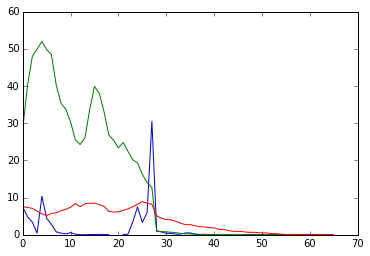

In [54]:
plt.plot(point)
plt.plot(catchment)
plt.plot(domain)
